# WMT of tendency terms
## CM2.6
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Make histogram of each term](#first-bullet)
* [Save histograms](#second-bullet)

# 1) Make histogram of each term <a class='anchor' id='first-bullet'> </a>

In [1]:
!pip install git+https://github.com/mathause/regionmask.git

  Cloning https://github.com/mathause/regionmask.git to /tmp/pip-req-build-vff86m4e
  Running command git clone --filter=blob:none --quiet https://github.com/mathause/regionmask.git /tmp/pip-req-build-vff86m4e
  Resolved https://github.com/mathause/regionmask.git to commit 31b39e0ff6f2635ab4c92de800efb04c79a8ee24
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for regionmask: filename=regionmask-0.9.0.post1.dev27+g31b39e0-py3-none-any.whl size=65494 sha256=afc119a77e89ebbb3e49ebc15aa35d27fae4bf8f65e5aa01698eda5441a2c250
  Stored in directory: /tmp/pip-ephem-wheel-cache-5sm_cr7y/wheels/1a/62/0f/f392f37f9bd2d2d61b9a6b63de17bb421b3f7c2972b03c9934
Successfully built regionmask


In [2]:
!pip install git+https://github.com/jbusecke/xmip.git

  Cloning https://github.com/jbusecke/xmip.git to /tmp/pip-req-build-e9wxgtan
  Running command git clone --filter=blob:none --quiet https://github.com/jbusecke/xmip.git /tmp/pip-req-build-e9wxgtan
  Resolved https://github.com/jbusecke/xmip.git to commit 16ce8bbe4df5ea4150f7da516eeccc6fd06131a4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached xgcm-0.6.1-py3-none-any.whl (60 kB)
  Created wheel for xmip: filename=xmip-0.7.2.dev4+g16ce8bb-py3-none-any.whl size=58752 sha256=d52b9a2028aef1005ab7f9da37b54648a86f437c3d86cd9ad7ea2d9d2b67b230
  Stored in directory: /tmp/pip-ephem-wheel-cache-4jublvvs/wheels/14/81/1d/2382ef5c4df3bc79c5b5a3c37400af047e5a775a4b2cf79b42
Successfully built xmip
  Attempting uninstall: xgcm
    Found existing installation: xgcm 0.8.1
    Uninstalling xgcm-0.8.1:
      Successfully uninstalled xgcm-0.8.1
  Attempting uninstall: xmip
    Found existing installation: x

In [2]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [3]:
client

<Client: 'tls://10.0.1.49:8786' processes=30 threads=60, memory=900.00 GiB>

In [114]:
cluster.close()
client.close()

In [4]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
from fastjmd95 import jmd95numba
import gcsfs
import gcm_filters
import xgcm
from typing import Annotated
import gsw

In [5]:
from intake import open_catalog

url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/GFDL_CM2.6.yaml"
cat = open_catalog(url)
ds  = cat["GFDL_CM2_6_control_ocean"].to_dask()
coord  = cat["GFDL_CM2_6_grid"].to_dask()

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [6]:
#Load in tendencies

import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [7]:
tracers = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/tracer_tendencies.zarr'))
drhodts = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/drhodts_tendencies.zarr'))
rho_cab = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/rho_lap_cab_tendencies.zarr'))

tendencies = xr.merge([tracers, drhodts, rho_cab])

In [8]:
tendencies

<xarray.Dataset>
Dimensions:    (time: 240, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time       (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * xt_ocean   (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean   (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    SSS_lap    (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    SST_lap    (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    drhods     (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    drhodt     (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    cabbeling  (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    rho        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    rho_lap    (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>

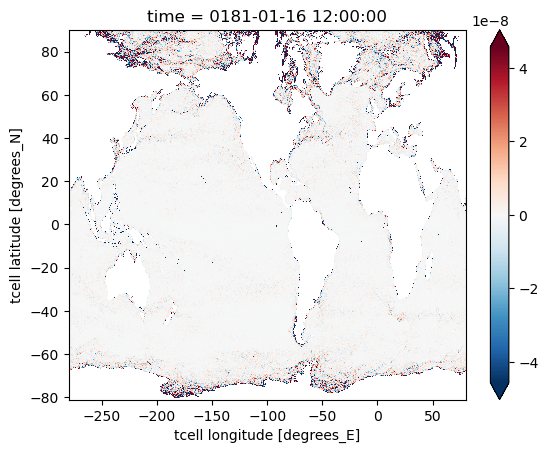

In [11]:
(tendencies.SSS_lap * tendencies.rho * tendencies.drhods)[0].plot(robust=True)

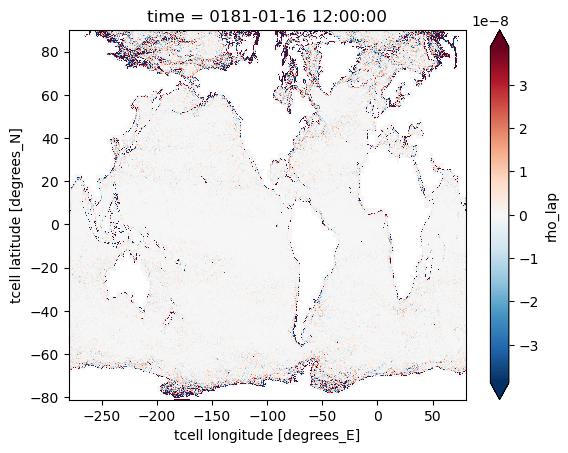

In [5]:
rho_cab.rho_lap[0].plot(robust=True)

# Create basin mask for CM2.6

In [9]:
import regionmask  
from xmip.preprocessing import combined_preprocessing
from xmip.regionmask import merged_mask

<GeoAxes: >

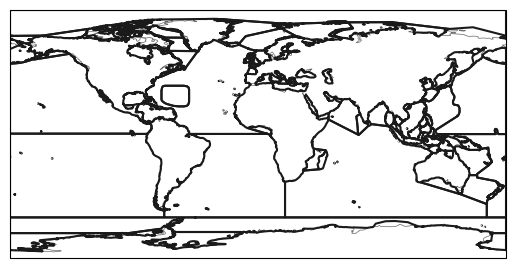

In [10]:
# load ocean basin data
basins = regionmask.defined_regions.natural_earth_v4_1_0.ocean_basins_50
basins.plot(add_ocean=False, add_label=False)

In [11]:
da = ds.temp.isel(time=0, st_ocean=0).squeeze()

In [12]:
da_renamed = da.rename({'geolat_t':'lat', 'geolon_t':'lon'}).load()

In [13]:
da_renamed

<xarray.DataArray 'temp' (yt_ocean: 2700, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    lat       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    lon       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    st_ocean  float64 5.034
    time      object 0181-01-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Attributes:
    cell_methods:   time: mean
    long_name:      Potential temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-10.0, 500.0]

In [14]:
mask = merged_mask(basins, da_renamed)

/srv/conda/envs/notebook/lib/python3.10/site-packages/regionmask/core/mask.py:151: FutureWarning: Passing 'lon_name' and 'lat_name' is deprecated. Please pass the lon and lat coordinates direcly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


In [15]:
mask

<xarray.DataArray 'mask' (yt_ocean: 2700, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lat       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    lon       (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    st_ocean  float64 5.034
    time      object 0181-01-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98

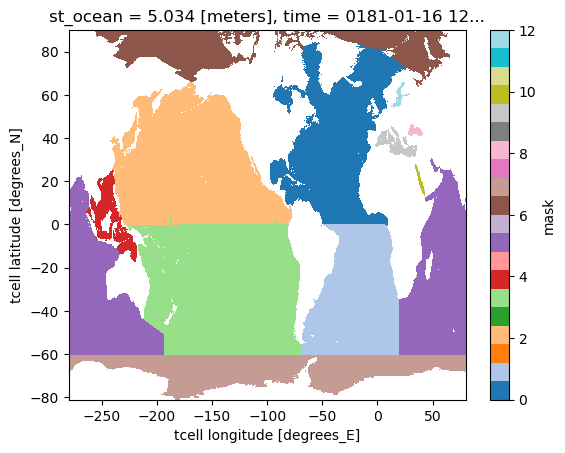

In [19]:
mask.plot(cmap='tab20');

# Make histogram of each term

In [16]:
#New ds after dthetadt*drhodt and dSdt*drhods
def new_ds(ds):
    newds = xr.merge([(ds['SST_lap']*ds['drhodt']*ds['rho']).rename('sst'),
                      (ds['SSS_lap']*ds['drhods']*ds['rho']).rename('sss'),
                       ds['rho_lap'].rename('rho'),
                       ds['cabbeling']])
    return newds

In [17]:
tend = new_ds(tendencies)

In [18]:
tend

<xarray.Dataset>
Dimensions:    (time: 240, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time       (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * xt_ocean   (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean   (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    sst        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    sss        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    rho        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    cabbeling  (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>

In [19]:
#assign each region index value to basin name

north_atlantic_ocean = 0
south_atlantic_ocean = 1
north_pacific_ocean = 2
south_pacific_ocean = 3
south_china_seas = 4
indian_ocean = 5
arctic_ocean = 6
southern_ocean = 7
black_sea = 8
med_sea = 9
red_sea = 10
baltic_sea = 12 #no 11

In [20]:
np.unique(mask)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., nan])

In [21]:
rmask = mask
#mask_bins = np.arange(rmask.min()-0.5, rmask.max()+0.5)
mask_bins = np.array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 12.5, 99.5])
rho = tendencies.rho
delta_rho = 0.1
rho_bins = np.arange(1015, 1035, delta_rho)

## Find most frequently occuring isopycnal

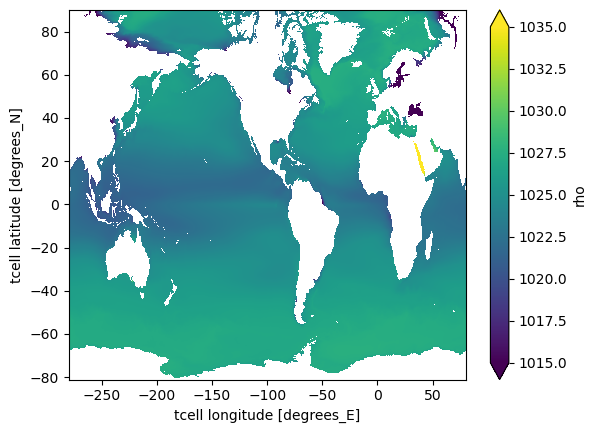

In [34]:
tendencies.rho.mean('time').plot(vmin=1015, vmax=1035);

In [22]:
from xhistogram.xarray import histogram
pdf_rho = histogram(rho, bins=[rho_bins], dim=['xt_ocean', 'yt_ocean'], density=True)

In [27]:
pdf_rho

<xarray.DataArray 'histogram_rho' (time: 240, rho_bin: 199)>
dask.array<truediv, shape=(240, 199), dtype=float64, chunksize=(1, 199), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * rho_bin  (rho_bin) float64 1.015e+03 1.015e+03 ... 1.035e+03 1.035e+03

In [23]:
mean_pdf_rho = pdf_rho.mean('time')

In [38]:
mean_pdf_rho

<xarray.DataArray 'histogram_rho' (rho_bin: 199)>
dask.array<mean_agg-aggregate, shape=(199,), dtype=float64, chunksize=(199,), chunktype=numpy.ndarray>
Coordinates:
  * rho_bin  (rho_bin) float64 1.015e+03 1.015e+03 ... 1.035e+03 1.035e+03

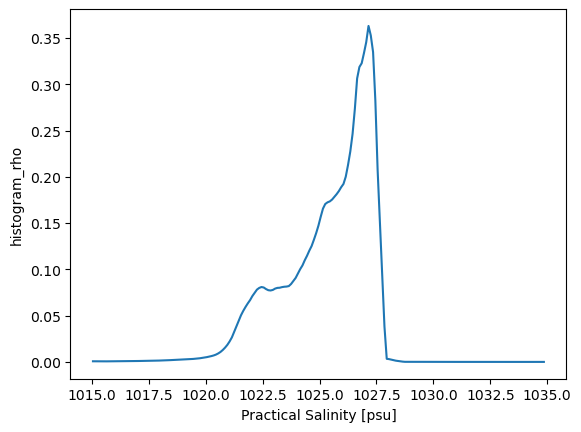

In [39]:
mean_pdf_rho.plot()

In [40]:
mean_pdf_rho.argmax().values

array(121)

In [41]:
mean_pdf_rho[121].rho_bin

<xarray.DataArray 'rho_bin' ()>
array(1027.15)
Coordinates:
    rho_bin  float64 1.027e+03
Attributes:
    cell_methods:   time: mean
    long_name:      Practical Salinity
    standard_name:  sea_water_salinity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          psu
    valid_range:    [-10.0, 100.0]

In [42]:
rho_bins[121] #1027.1 is the most frequently occurring density 

1027.1000000000026

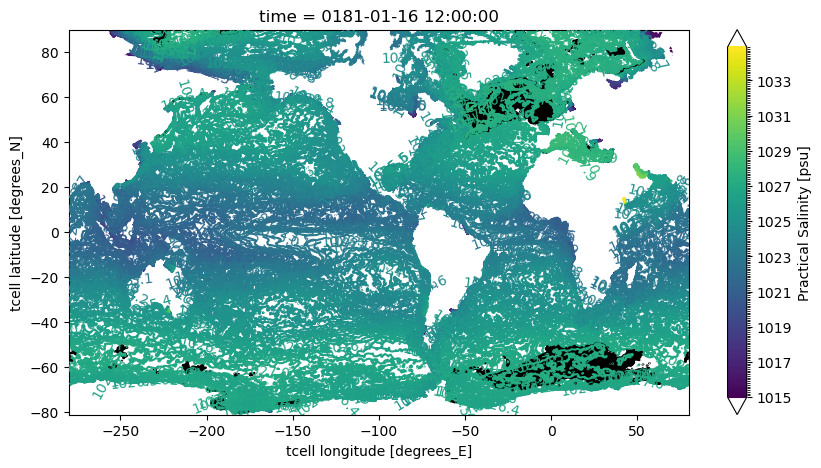

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
C = rho[0].plot.contour(levels=rho_bins, ax=ax, add_colorbar=True)
C.collections[121].set_color('k')
C.collections[121].set_linewidth(1.5)
plt.clabel(C);

In [24]:
avg_mld = ds.mld.mean('time').compute()
weights = coord.area_t*avg_mld

In [25]:
def histogram_func(variable, slicing=None, atl_pac=True):
    """Generalized xhistogram's histogram function 
        applied to sliced basin-wide WMT terms"""
    
    if slicing==None:
        hist = histogram(rho, mask.rename('basin_mask'), bins=[rho_bins, mask_bins],
                     weights=(variable.fillna(0.)*weights), dim=['xt_ocean', 'yt_ocean']) / delta_rho
    elif slicing=='north':
        if atl_pac==True:
            hist = histogram(rho.where(atl_mask).isel(nlat=slice(1200, None)),
                         bins=[rho_bins],
                         weights=(variable.fillna(0.)*weights).where(atl_mask).isel(nlat=slice(1200, None)), 
                         dim=['xt_ocean', 'yt_ocean']) / delta_rho
        else:
            hist = histogram(rho.where(mask==pacific_ocean).isel(nlat=slice(1200, None)), 
                         bins=[rho_bins],
                         weights=(variable.fillna(0.)*weights).where(mask==pacific_ocean).isel(nlat=slice(1200, None)), 
                         dim=['xt_ocean', 'yt_ocean']) / delta_rho
    elif slicing=='south':
        if atl_pac==True:
            hist = histogram(rho.where(atl_mask).isel(nlat=slice(None, 1200)), 
                             mask.where(mask==atlantic_ocean).isel(nlat=slice(None, 1200)), 
                         bins=[rho_bins, mask_bins],
                         weights=(variable.fillna(0.)*weights).where(atl_mask).isel(nlat=slice(None, 1200)), 
                         dim=['xt_ocean', 'yt_ocean']) / delta_rho
        else:
            hist = histogram(rho.where(mask==pacific_ocean).isel(nlat=slice(None, 1200)), 
                                 mask.where(mask==pacific_ocean).isel(nlat=slice(None, 1200)), 
                         bins=[rho_bins, mask_bins],
                         weights=(variable.fillna(0.)*weights).where(mask==pacific_ocean).isel(nlat=slice(None, 1200)), 
                         dim=['xt_ocean', 'yt_ocean']) / delta_rho
    return hist

In [26]:
all_tendencies = list(tend)

In [27]:
hists = xr.merge([histogram_func(tend[var]).rename('OMEGA_' + var)
                      for var in all_tendencies])

In [28]:
hists

<xarray.Dataset>
Dimensions:          (time: 240, rho_bin: 199, basin_mask_bin: 12)
Coordinates:
  * time             (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * rho_bin          (rho_bin) float64 1.015e+03 1.015e+03 ... 1.035e+03
  * basin_mask_bin   (basin_mask_bin) float64 1.0 2.0 3.0 4.0 ... 10.0 11.5 56.0
Data variables:
    OMEGA_sst        (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 12), meta=np.ndarray>
    OMEGA_sss        (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 12), meta=np.ndarray>
    OMEGA_rho        (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 12), meta=np.ndarray>
    OMEGA_cabbeling  (time, rho_bin, basin_mask_bin) float64 dask.array<chunksize=(1, 199, 12), meta=np.ndarray>

In [29]:
#mask indices are ok since the major basins are all positive
hists.basin_mask_bin

<xarray.DataArray 'basin_mask_bin' (basin_mask_bin: 12)>
array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11.5, 56. ])
Coordinates:
  * basin_mask_bin  (basin_mask_bin) float64 1.0 2.0 3.0 4.0 ... 10.0 11.5 56.0

In [30]:
southern_ocean

7

In [31]:
hists.sel(basin_mask_bin=southern_ocean+1)

<xarray.Dataset>
Dimensions:          (time: 240, rho_bin: 199)
Coordinates:
  * time             (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * rho_bin          (rho_bin) float64 1.015e+03 1.015e+03 ... 1.035e+03
    basin_mask_bin   float64 8.0
Data variables:
    OMEGA_sst        (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>
    OMEGA_sss        (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>
    OMEGA_rho        (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>
    OMEGA_cabbeling  (time, rho_bin) float64 dask.array<chunksize=(1, 199), meta=np.ndarray>

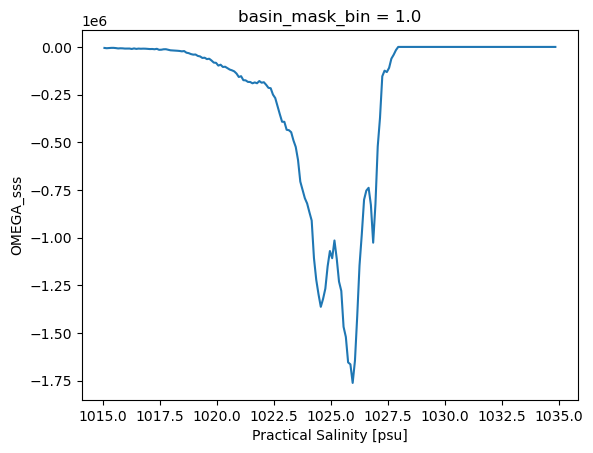

In [34]:
hists.sel(basin_mask_bin=north_atlantic_ocean+1).OMEGA_sss.mean('time').plot()

# Split the tendencies by basin

In [28]:
def basin_selection(tend_term, basin):
    tendency_in_basin = tend_term.where(mask==basin)
    return tendency_in_basin

In [29]:
#Atlantic Ocean - going to add 'NATL' prefix after adding natl_ocean+nor_sea+lab_sea respective vars
natl_ocean = xr.merge([basin_selection(tend[var],
                                       north_atlantic_ocean).rename('NATL_' + var) for var in all_tendencies])
satl_ocean = xr.merge([basin_selection(tend[var], 
                                       south_atlantic_ocean).rename('SATL_' + var) for var in all_tendencies])

#Pacific Ocean
npac_ocean = xr.merge([basin_selection(tend[var], 
                                       north_pacific_ocean).rename('NPAC_' + var) for var in all_tendencies])
spac_ocean = xr.merge([basin_selection(tend[var], 
                                       south_pacific_ocean).rename('SPAC_' + var) for var in all_tendencies])

#Indian Ocean
ind_ocean = xr.merge([basin_selection(tend[var], indian_ocean).rename('IND_' + var) for var in all_tendencies])

#Arctic Ocean
arc_ocean = xr.merge([basin_selection(tend[var], arctic_ocean).rename('ARC_' + var) for var in all_tendencies])

#Southern Ocean
south_ocean = xr.merge([basin_selection(tend[var], 
                                        southern_ocean).rename('South_' + var) for var in all_tendencies])

In [30]:
natl_ocean

<xarray.Dataset>
Dimensions:         (time: 240, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time            (time) object 0181-01-16 12:00:00 ... 0200-12-16 12:00:00
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
    lat             (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan
    lon             (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan
    st_ocean        float64 5.034
Data variables:
    NATL_sst        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    NATL_sss        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    NATL_rho        (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    NATL_cabbeling  (time, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>

# Plot tendencies by basin

## North Atlantic

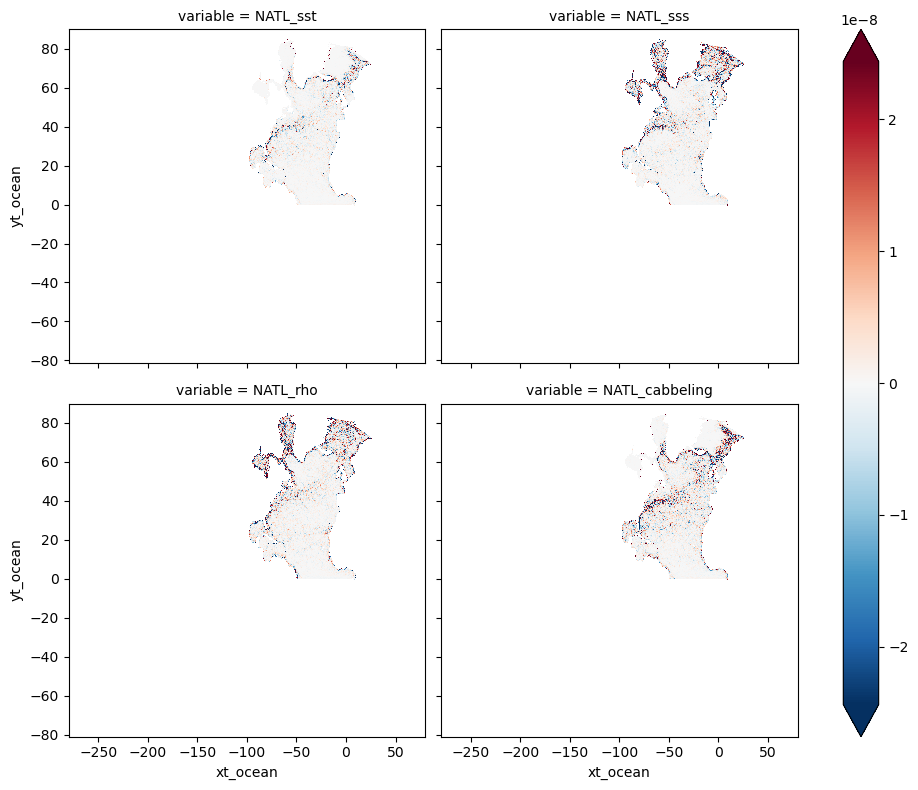

In [37]:
natl_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

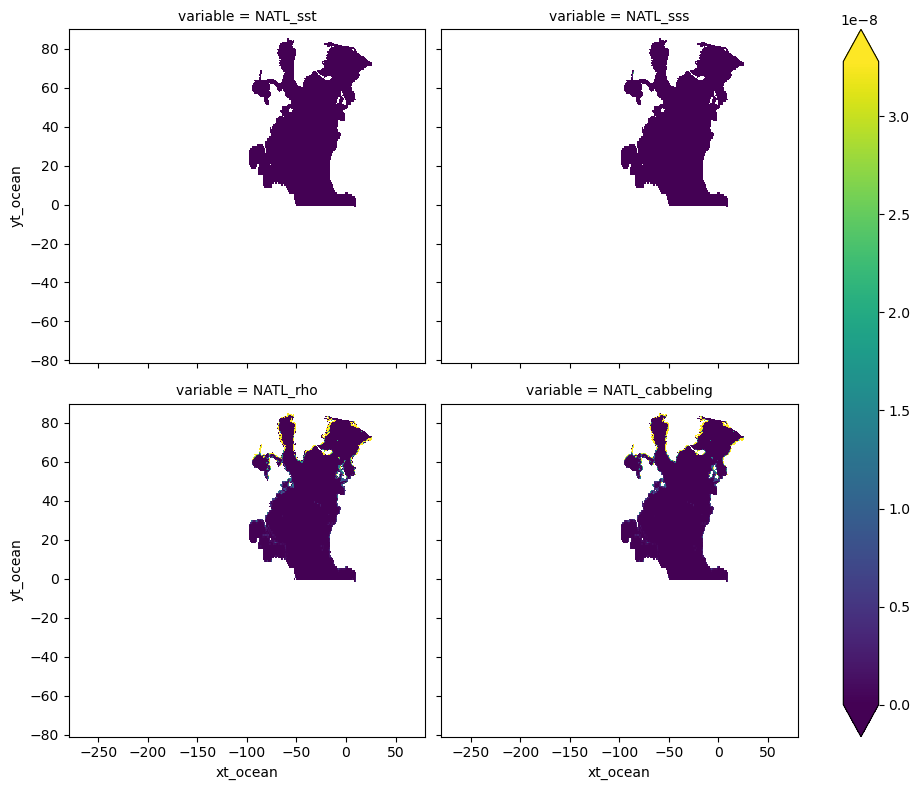

In [42]:
(natl_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

## South Atlantic

In [ ]:
satl_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

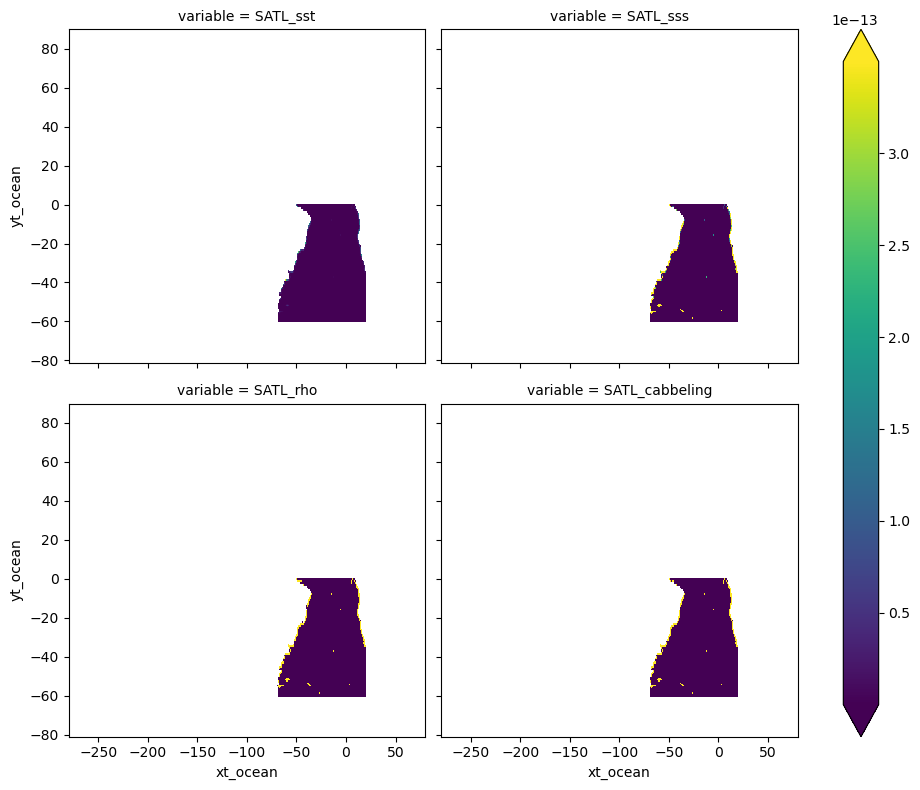

In [78]:
(satl_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

## North Pacific

In [ ]:
npac_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

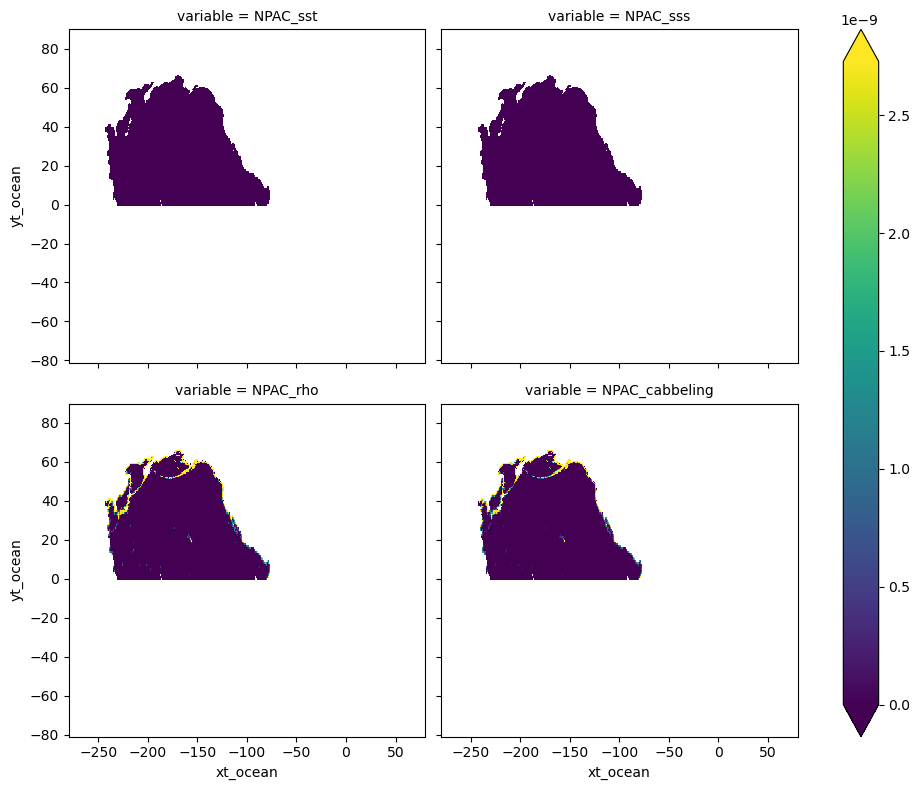

In [79]:
(npac_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

## South Pacific

In [ ]:
spac_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

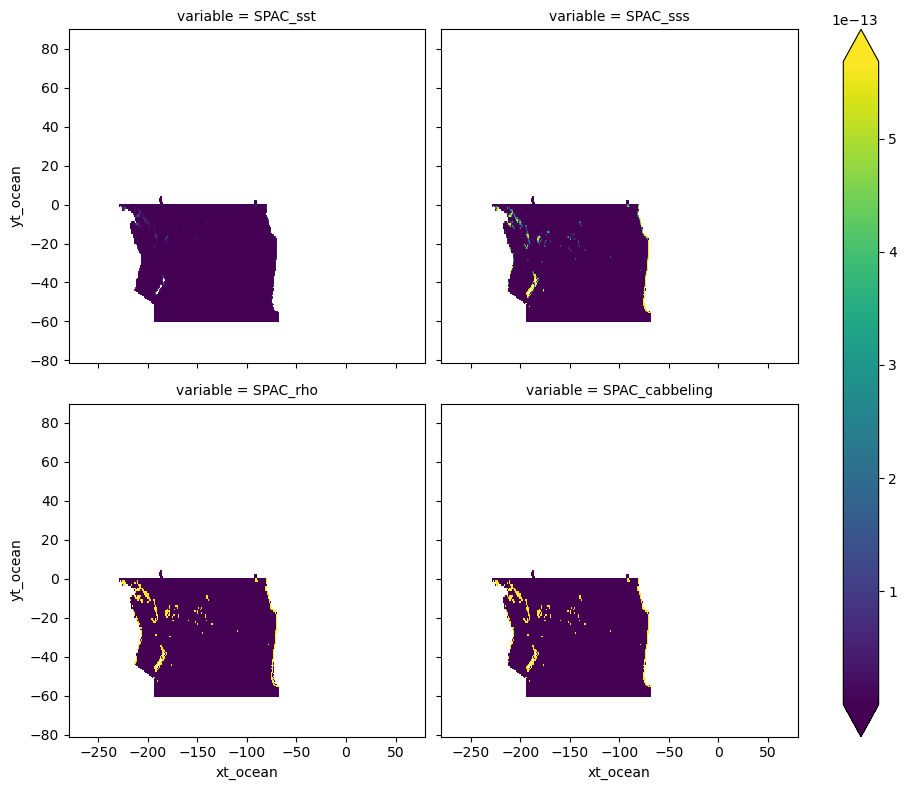

In [80]:
(spac_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

## Indian

In [ ]:
ind_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

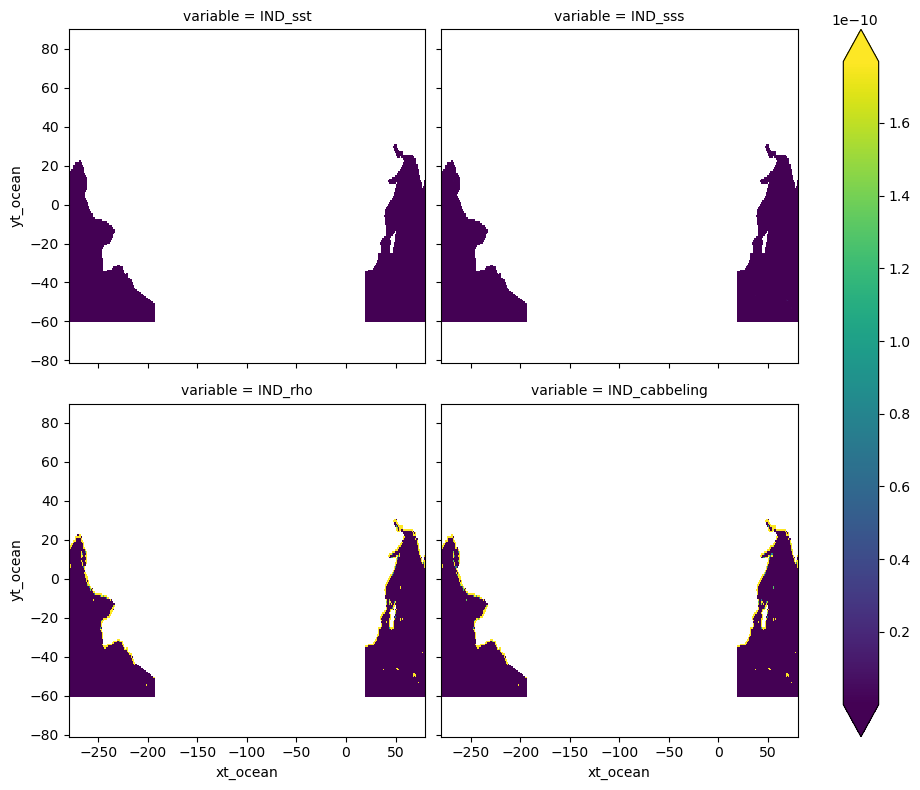

In [81]:
(ind_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

## Arctic

In [ ]:
arc_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

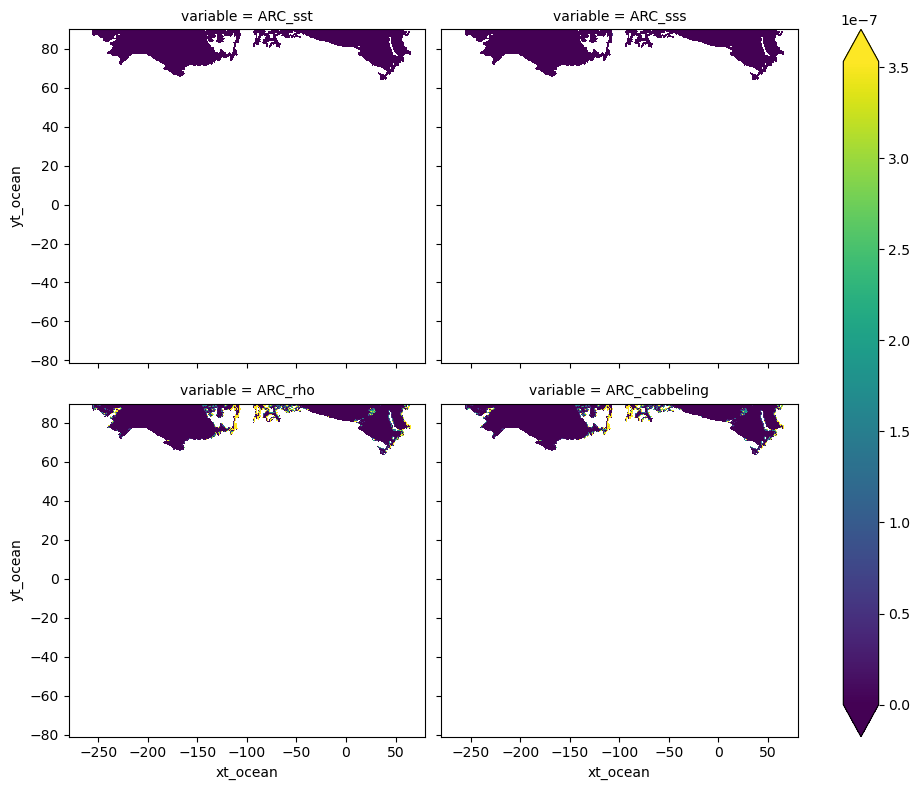

In [82]:
(arc_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

## Southern

In [ ]:
south_ocean.isel(time=0).to_array().plot(col='variable', col_wrap=2, 
                                        robust=True, figsize=(10, 8))

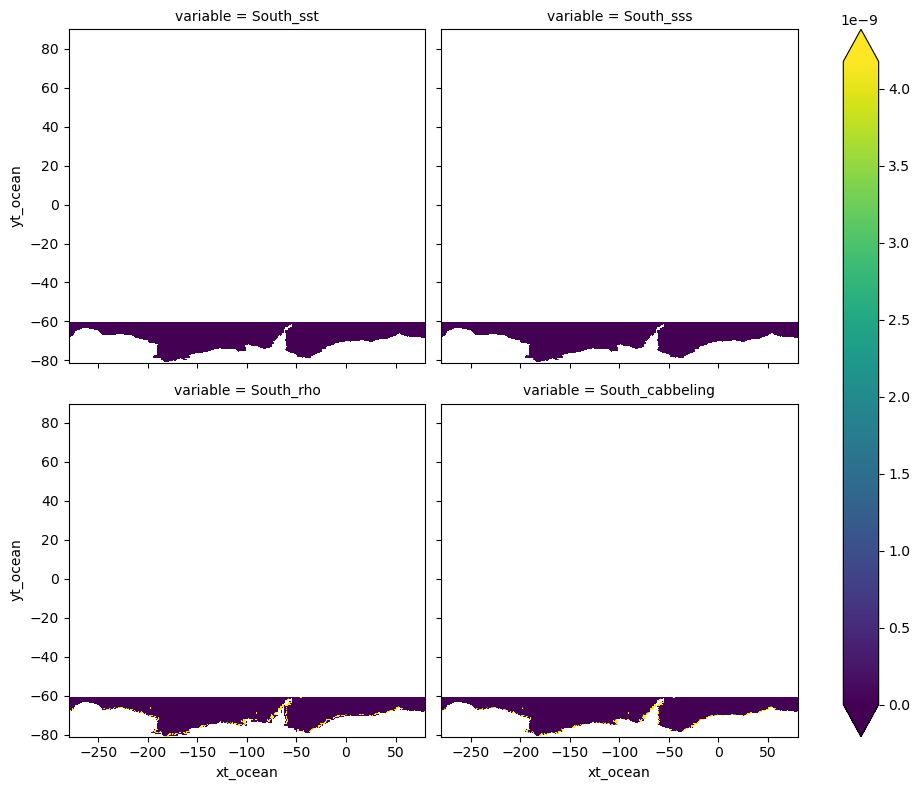

In [83]:
(south_ocean.isel(time=0)**2).coarsen(xt_ocean=10, yt_ocean=10).mean().to_array().plot(col='variable', 
                                                                         col_wrap=2, robust=True, 
                                                                         figsize=(10, 8))

# 2) Save histograms <a class='anchor' id='second-bullet'> </a>

In [27]:
client.restart()

<Client: 'tls://10.2.23.2:8786' processes=18 threads=36, memory=540.00 GiB>

In [84]:
import dask, distributed
dask.config.get('distributed.scheduler.worker-saturation')

1.1

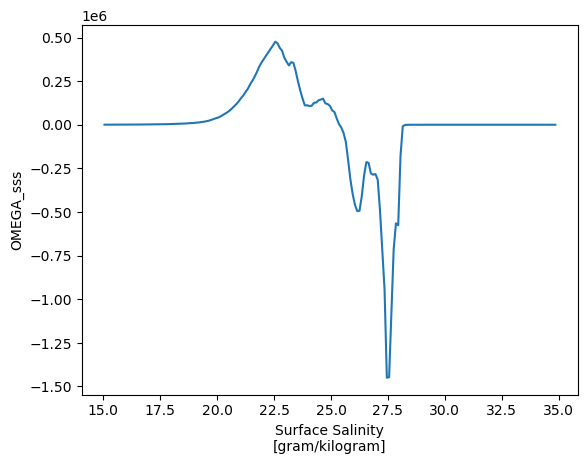

In [53]:
#OLD FIG FROM POP DATA
natl.OMEGA_sss.mean('time').plot()

# FIGS Start

In [54]:
def ann_mean2(ds):
    fig = plt.figure(figsize=(12,5))
    line_colors=['blue', 'k', 
                 'orange', 'green']#, 'purple', 'yellow'] #order of cab, rho, sss, sst, surf heat, surf salt
    for (i,j) in zip(list(ds.data_vars), line_colors):
        (ds[i].mean('time')/1e6).plot(label=f'{i}', color=j)
    plt.legend()
    plt.ylabel(r'Transformation (Sv)', fontsize=16)
    plt.grid()
    plt.title('Annual Mean Transformation Terms', fontsize=20);

In [31]:
#for the datasets from efficient histogram section
def ann_mean2(ds):
    fig = plt.figure(figsize=(12,5))
    line_colors=['green', 'orange', 
                 'k', 'blue']#, 'purple', 'yellow'] #order of sst, sss, rho, cab, surf heat, surf salt
    for (i,j) in zip(list(ds.data_vars), line_colors):
        (ds[i].mean('time')/1e6).plot(label=f'{i}', color=j)
    plt.legend()
    plt.ylabel(r'Transformation (Sv)', fontsize=16)
    plt.grid()
    plt.title('Annual Mean Transformation Terms', fontsize=20);

In [32]:
client.restart()

<Client: 'tls://10.0.1.49:8786' processes=0 threads=0, memory=0 B>

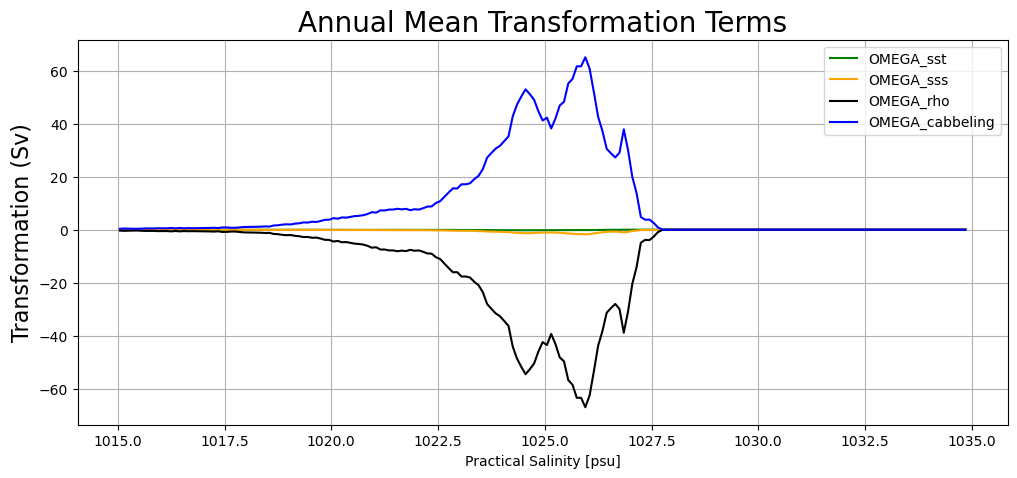

In [33]:
#natl
ann_mean2(hists.sel(basin_mask_bin=1))

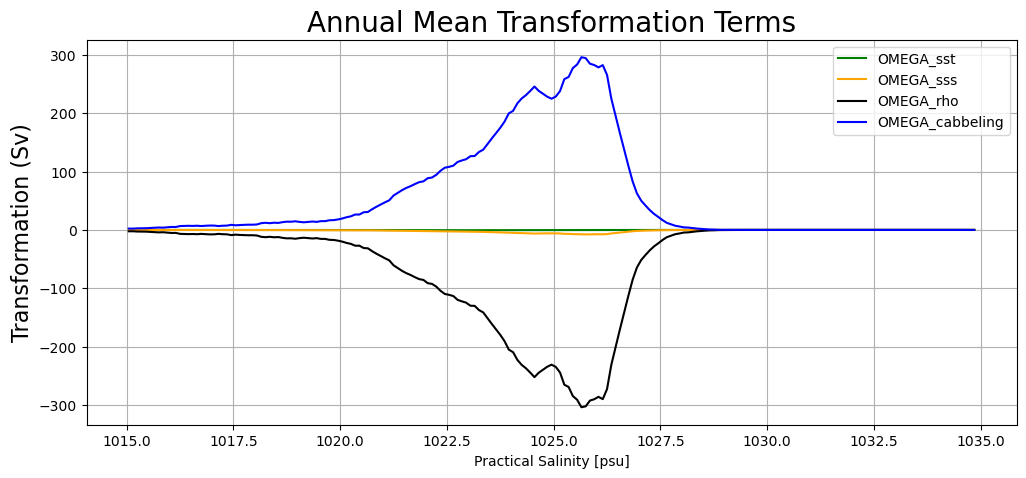

In [35]:
#satl
ann_mean2(hists.sel(basin_mask_bin=2))

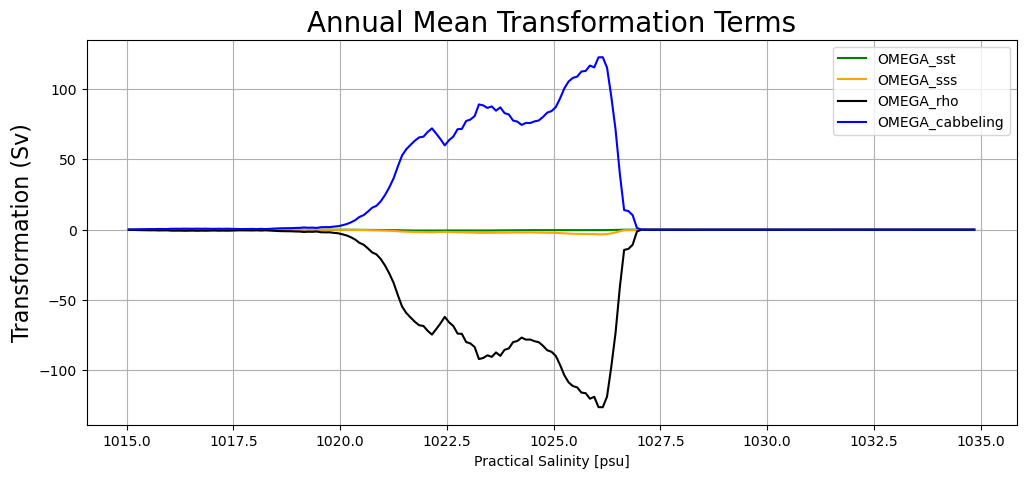

In [37]:
ann_mean2(hists.sel(basin_mask_bin=north_pacific_ocean+1))

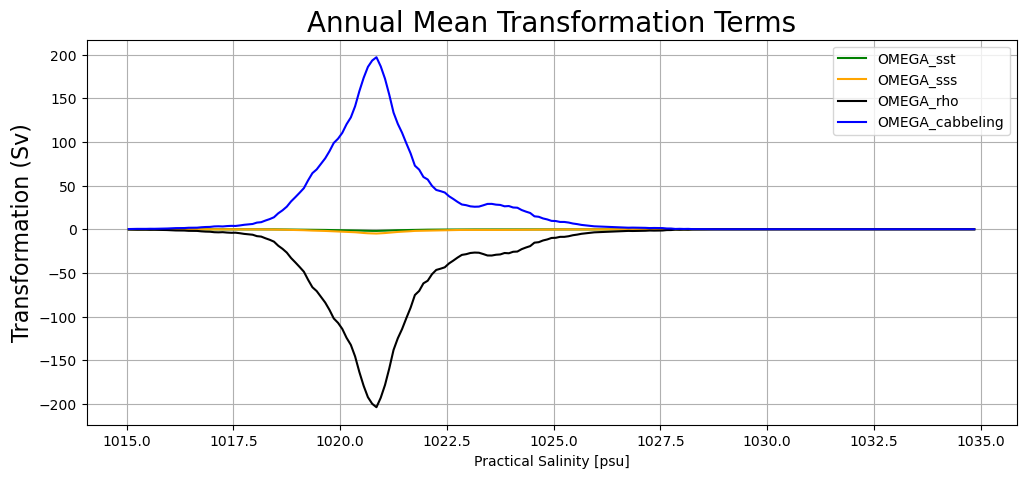

In [39]:
ann_mean2(hists.sel(basin_mask_bin=south_pacific_ocean+1))

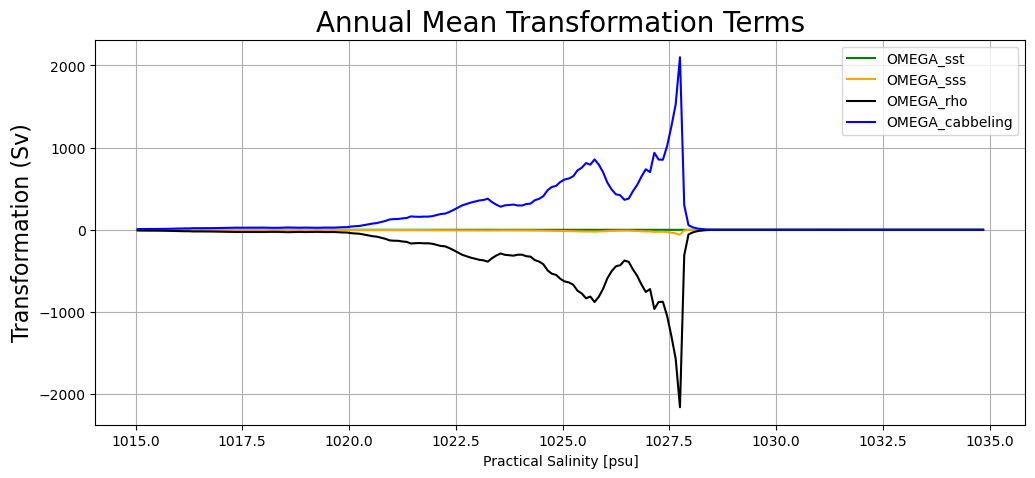

In [40]:
ann_mean2(hists.sel(basin_mask_bin=indian_ocean+1))

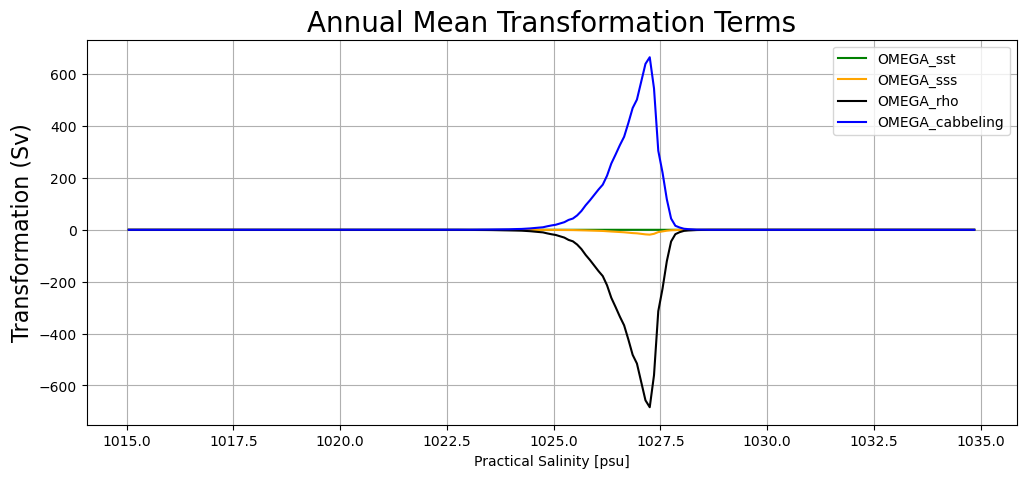

In [42]:
ann_mean2(hists.sel(basin_mask_bin=arctic_ocean+1))

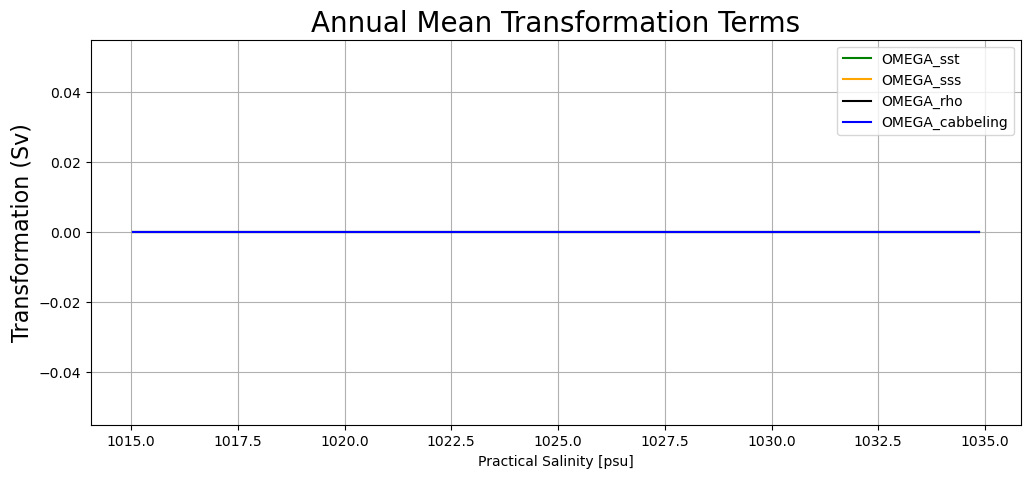

In [44]:
ann_mean2(hists.sel(basin_mask_bin=southern_ocean+1))

# FiGS end

In [30]:
#saving north atlantic basin histograms
gcsmap_hist_natl = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/basin-histograms/avg-mld/natl_histograms.zarr')
natl_histograms.to_zarr(gcsmap_hist_natl, mode='w')

KilledWorker: Attempted to run task ('where-getitem-getitem-1ee7a8e7487f6025964d78e3f51e6230', 7879, 0, 0) on 3 different workers, but all those workers died while running it. The last worker that attempt to run the task was tls://10.2.46.3:44827. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

In [31]:
client.restart()

<Client: 'tls://10.2.23.2:8786' processes=23 threads=46, memory=690.00 GiB>

In [ ]:
#saving north pacific basin histograms
gcsmap_hist_npac = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/basin-histograms/avg-mld/npac_histograms.zarr')
npac_histograms.to_zarr(gcsmap_hist_npac, mode='w')

Task exception was never retrieved
future: <Task finished name='Task-15905' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py:2119> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 2128, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-15906' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py:2119> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 2128, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-15907' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/p

In [31]:
cluster.close()
client.close()

[Back to top](#top)